In [2]:
import numpy as np
import pandas as pd

In [21]:
data = pd.read_csv("../data/train.csv")
data[:5]

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,NaN
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,NaN
3,1606b0e6_0,210.124111,start,NaN
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']


In [26]:
len(data)

11218

In [4]:
data.nunique()

video_id               12
time                11204
event                   5
event_attributes       14
dtype: int64

In [15]:
types_of_actions =  data['event'].value_counts()
types_of_actions

play         3586
start        3418
end          3418
challenge     624
throwin       172
Name: event, dtype: int64

<AxesSubplot:>

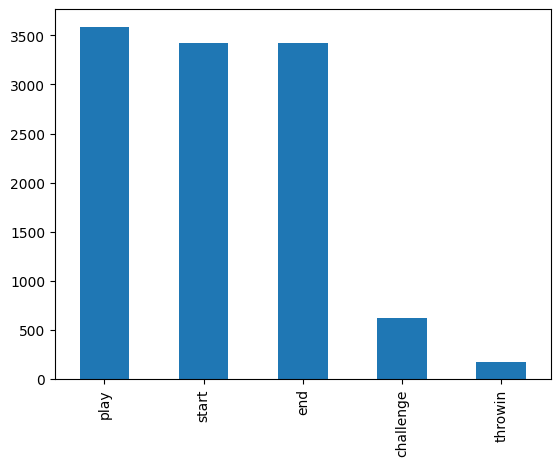

In [16]:
data['event'].value_counts().plot.bar()

In [18]:
data_percentage =  (types_of_actions[:] / types_of_actions[:].sum()) * 100
data_percentage

play         31.966482
start        30.468889
end          30.468889
challenge     5.562489
throwin       1.533250
Name: event, dtype: float64

<AxesSubplot:ylabel='event'>

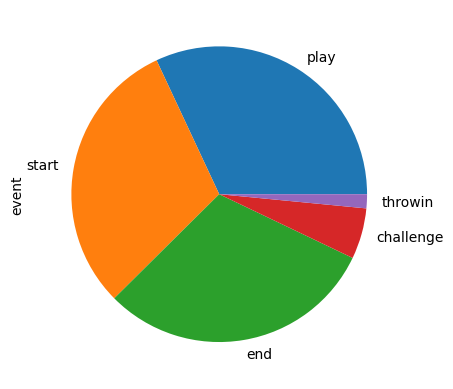

In [20]:
data_percentage.plot.pie()

In [30]:
data_non_null = data['event_attributes'].dropna()

In [32]:
data_non_null

1           ['ball_action_forced']
4        ['opponent_dispossessed']
7                         ['pass']
10            ['pass', 'openplay']
13            ['pass', 'openplay']
                   ...            
11206         ['pass', 'openplay']
11209         ['pass', 'openplay']
11210         ['pass', 'openplay']
11213    ['opponent_dispossessed']
11216                     ['pass']
Name: event_attributes, Length: 4382, dtype: object

In [41]:
counter = {}
def flatten_lists(attributes):
    for value in attributes:
        if counter[value]:
            counter[value] = counter[value] + 1
        else:
            counter[value] = 1

data_non_null.apply(lambda row : flatten_lists(row))
counter

KeyError: '['